In [1]:
#Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Setting graph size and style
from matplotlib import rcParams
rcParams['figure.figsize'] = 18, 8
sns.set_style('darkgrid')

In [3]:
#Loading in the dataset
titanic_df = pd.read_csv('titanic.csv')
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
#General infro for dataset
titanic_df.info()

#Can see that there are missing values in the Age, Cabin, and Embarked columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#General description of the dataset
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


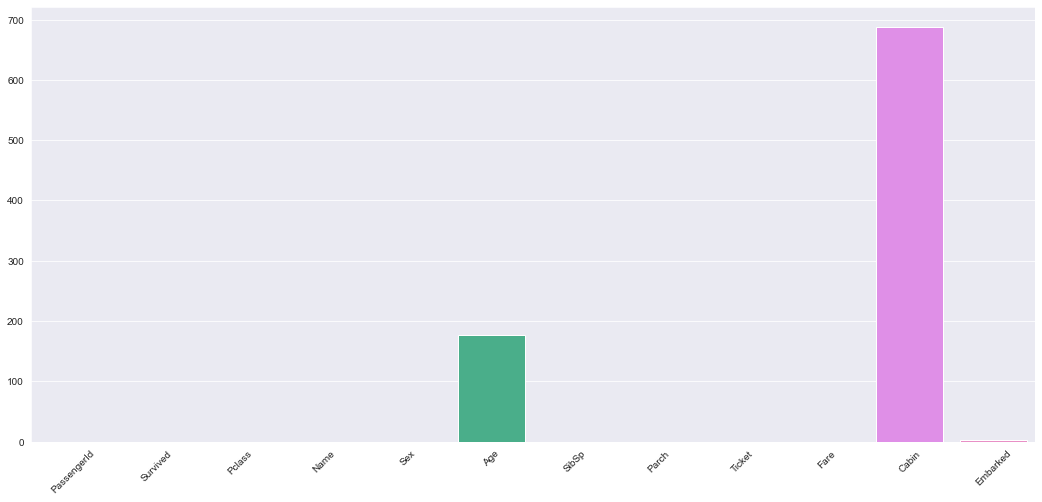

In [6]:
#Plot out mising data to better visualize it
sns.barplot(x=titanic_df.columns, y=titanic_df.isnull().sum().values)
plt.xticks(rotation = 45)
plt.show()

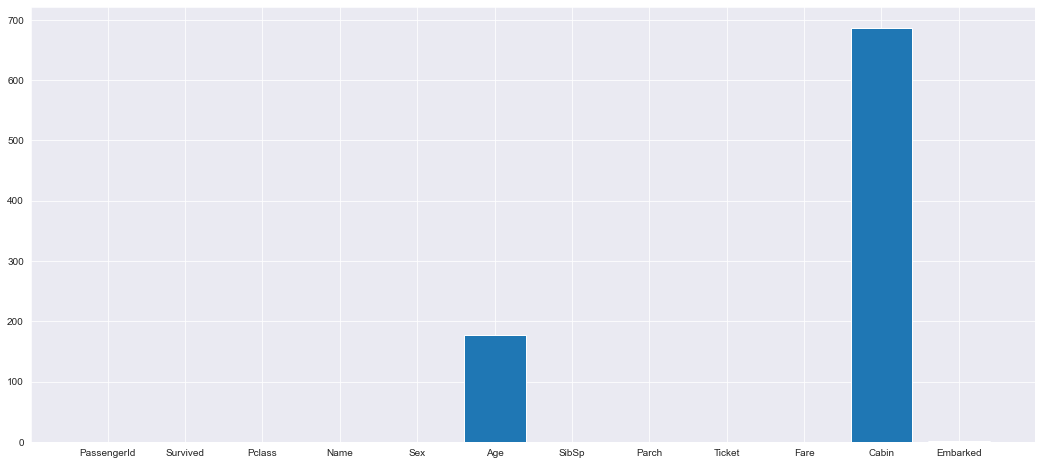

In [7]:
#Or we can try it will pyplot
plt.bar(x=titanic_df.columns, height = titanic_df.isnull().sum().values)
plt.show()

In [8]:
#Breaking down the titanic_df.isnull().sum().value code line
titanic_df.isnull() #Give back the dataframe but with True and False values placed where there are missing values

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
titanic_df.isnull().sum() #Sum of the total number of null values within a column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
#Calling index will give use index label
titanic_df.isnull().sum().index

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
# while calling .values willgive the missing values
titanic_df.isnull().sum().values

array([  0,   0,   0,   0,   0, 177,   0,   0,   0,   0, 687,   2],
      dtype=int64)

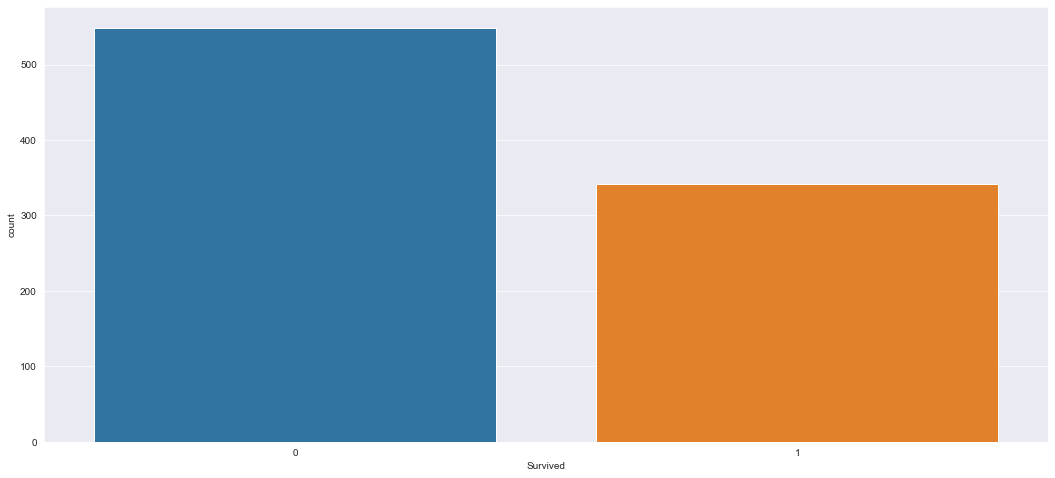

In [12]:
#Count plot with sns to see how many people survived
sns.countplot(x = titanic_df['Survived'])
plt.show()

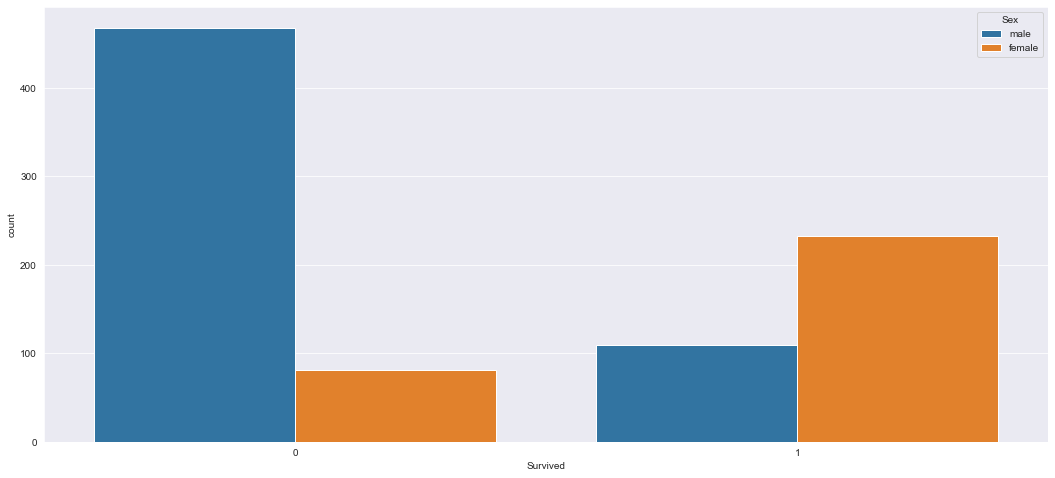

In [13]:
#Using the hue function with sns to seperate between the men and women who survived
sns.countplot(x = titanic_df['Survived'], hue = 'Sex', data = titanic_df)
plt.show()

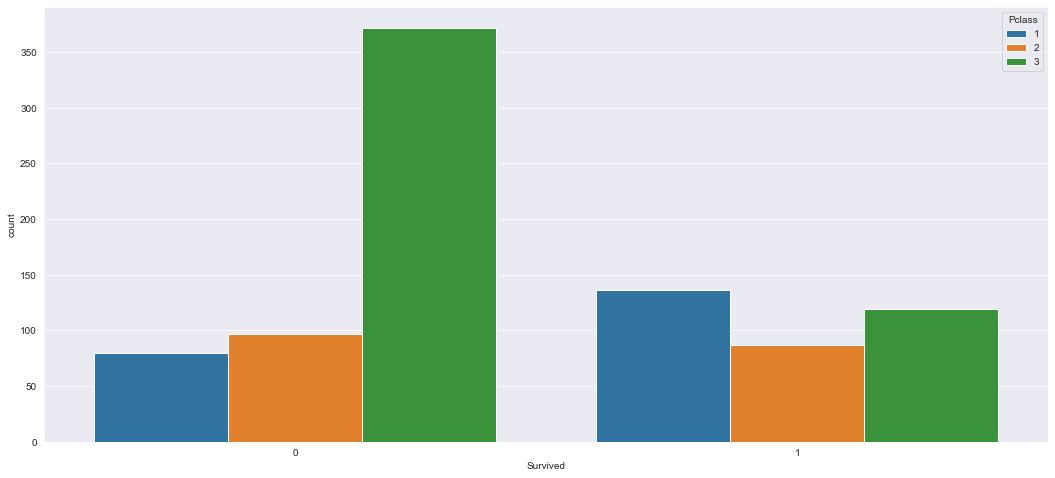

In [14]:
# Switched from sex to ticket class to see how many survived based on tickets
sns.countplot(x = titanic_df['Survived'], hue = 'Pclass', data = titanic_df)
plt.show()

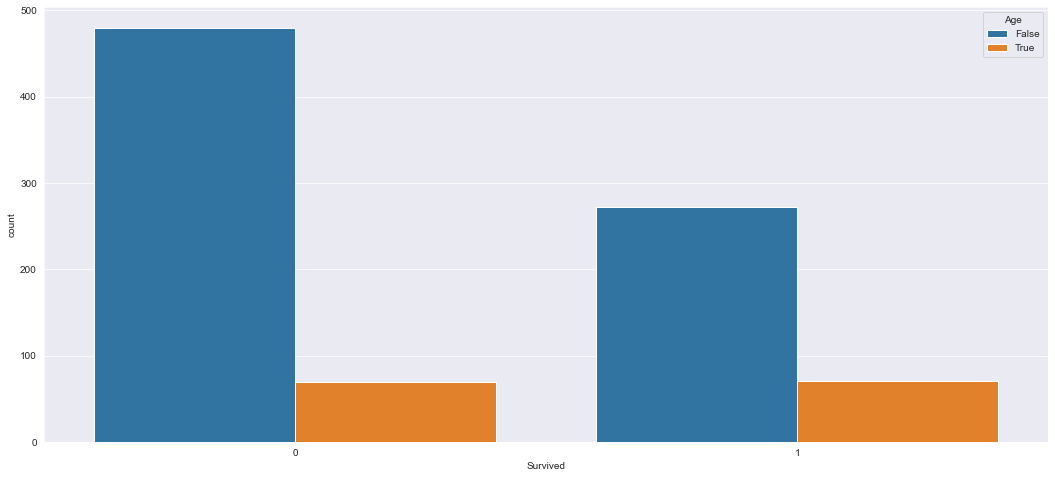

In [15]:
#Check survival rate between people under the age of 18 and upper
sns.countplot(x = titanic_df['Survived'], hue = titanic_df['Age'] <= 18)
plt.show()

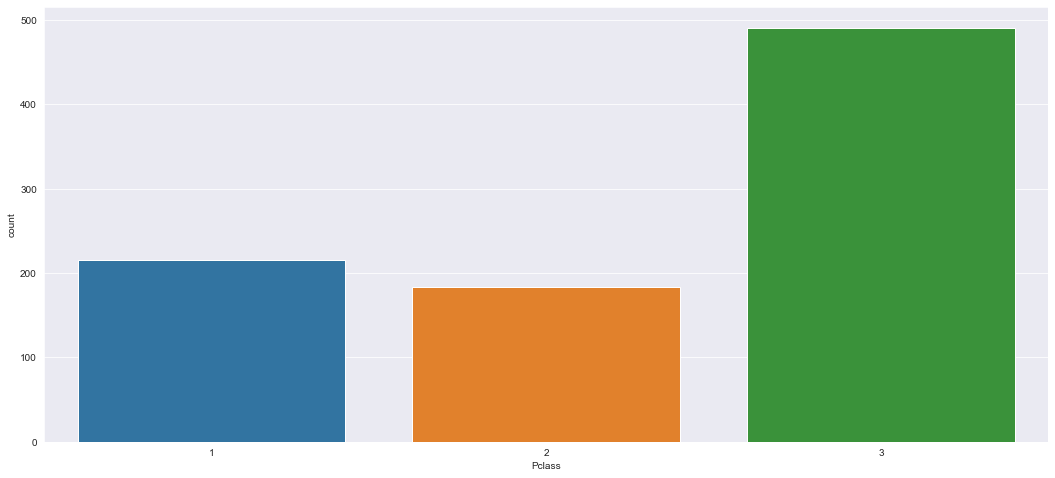

In [16]:
#Using the same countplot to see how many people purchase tickets on each ticket class
sns.countplot(x = titanic_df['Pclass'])
plt.show()
#Seems like while the majority of customers are from the 3rd ticket class, there are more people in the 1st class than 2nd class

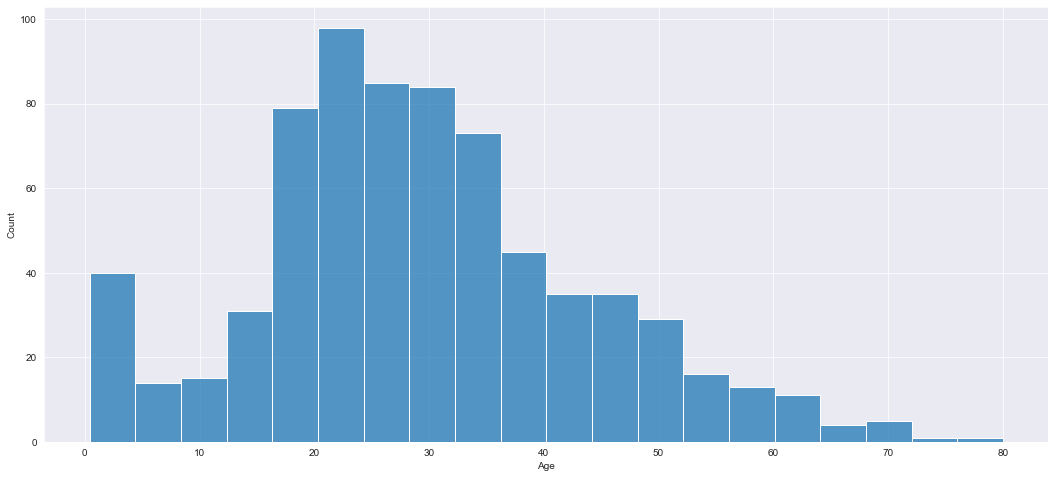

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [17]:
#Using hist plot to see age distribution
sns.histplot(x = titanic_df['Age'])
plt.show()
titanic_df['Age'].describe()

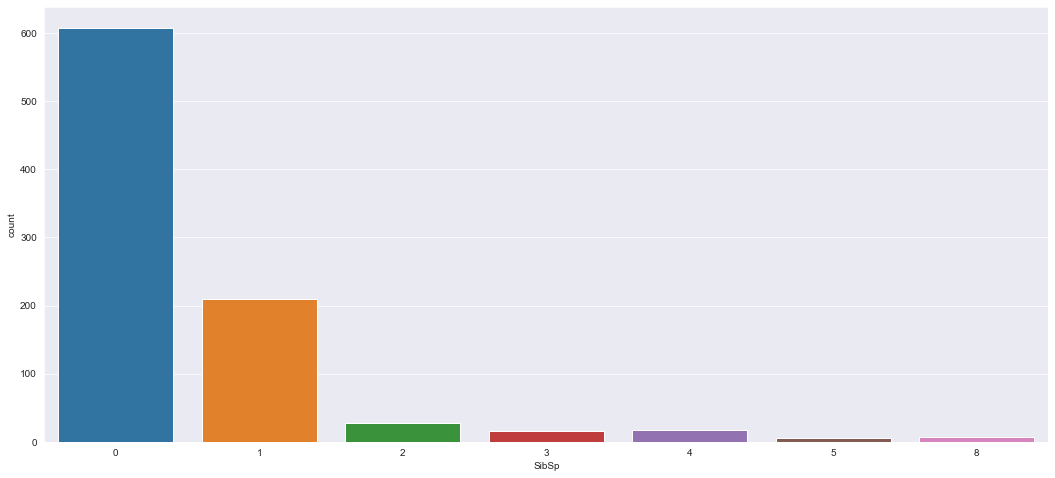

In [18]:
sns.countplot(x = titanic_df['SibSp'])
plt.show()
#It is interesting to see that there is 1 person on board with 8 family members

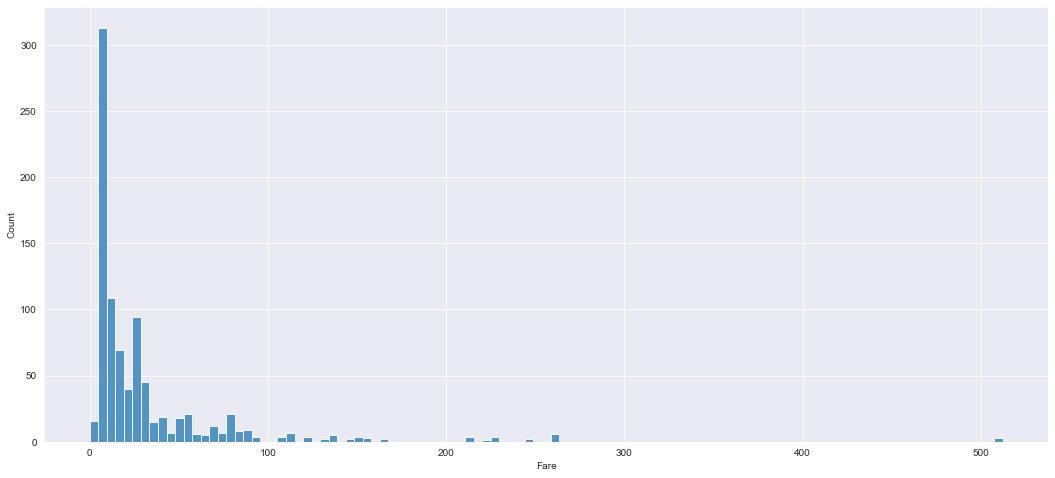

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [19]:
#Looking at average fare distribution using hist plot
sns.histplot(x = titanic_df['Fare'])
plt.show()
titanic_df['Fare'].describe()
#Seems like there are some people who got on board for free => Mostlikely the extra employee on board

In [20]:
######################################################## DATA PROCESSING TECHNIQUES ###########################################

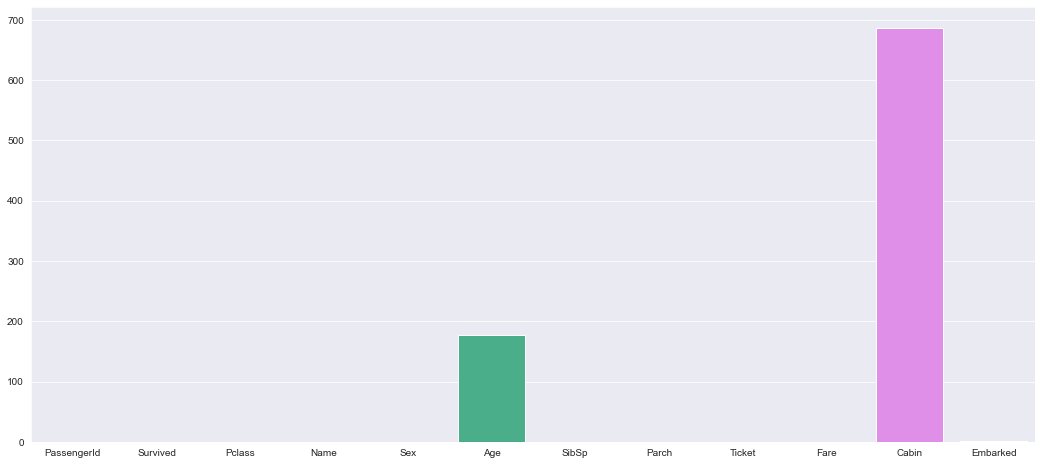

In [21]:
#Taking care of missing values (or Null values that we saw earlier)
sns.barplot(x = titanic_df.columns, y = titanic_df.isnull().sum().values)
plt.show()

In [22]:
#With age, one way is to apply the mean age to all the missing age values.
# We can do this by using pandas .apply(func) which will apply any function to every value along a column.
mean_age = int(titanic_df['Age'].mean())
titanic_df['Age'] = titanic_df['Age'].apply(lambda age : mean_age if pd.isnull(age) else age)
#lamda age : mean_age if pd.isnull(age) else age basically means for each age value in the columnd Age apply mean_age func
# if the age value is null if not then use the same value

29


<AxesSubplot:xlabel='Age', ylabel='Count'>

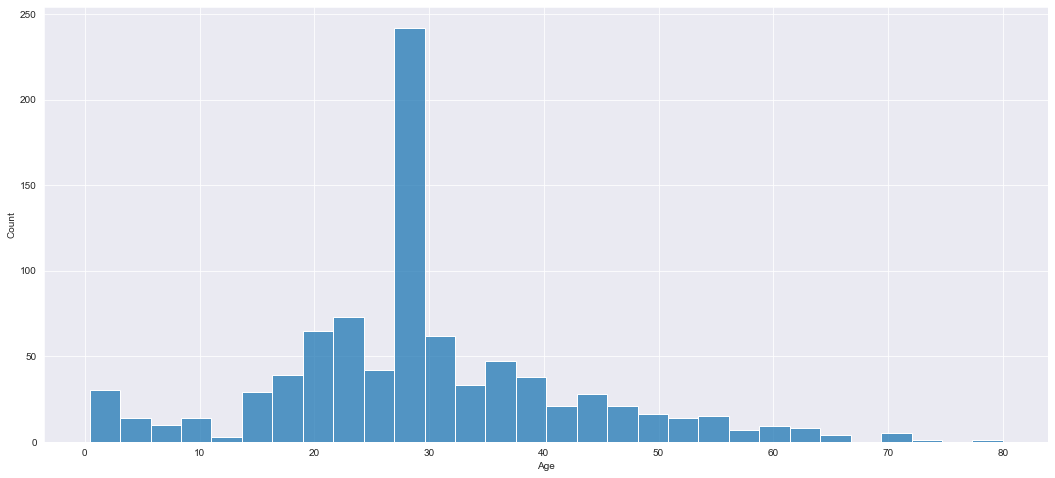

In [23]:
#Check the age distribution again using histogram
print(mean_age)
sns.histplot(x = titanic_df['Age'])
#Now there is a huge spike in the age 29 which means the function has been applied appropriately

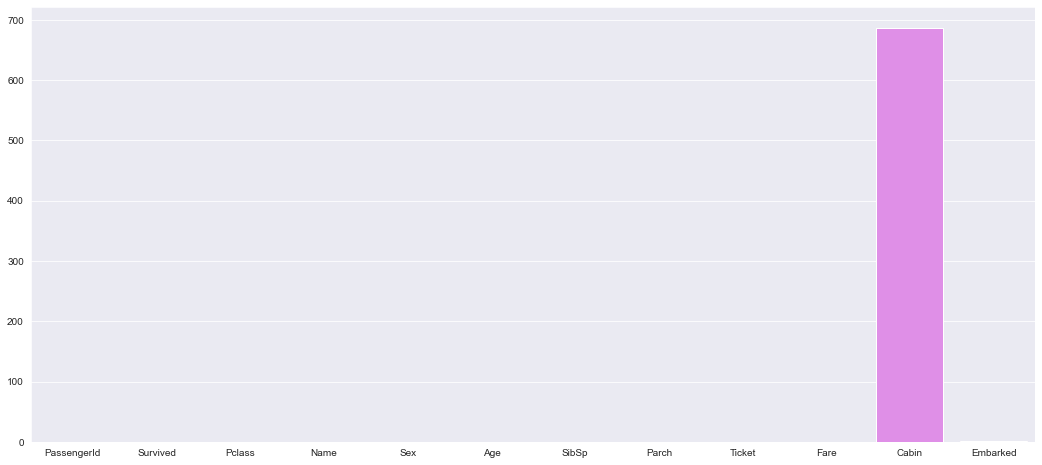

In [24]:
#Checking the same missing values plot, we can see that there is no missing values for age now
sns.barplot(x = titanic_df.columns, y = titanic_df.isnull().sum().values)
plt.show()

In [25]:
#For the Cabin column, we have too much missing dat to infere a proper values. Thus, we are going to drop the column
# with .drop(labels = , axis = 1, inplace = True)
titanic_df.drop(labels = ['Cabin'], axis = 1, inplace = True)
titanic_df.dropna(inplace = True) #Drop all NA values in the dataframe

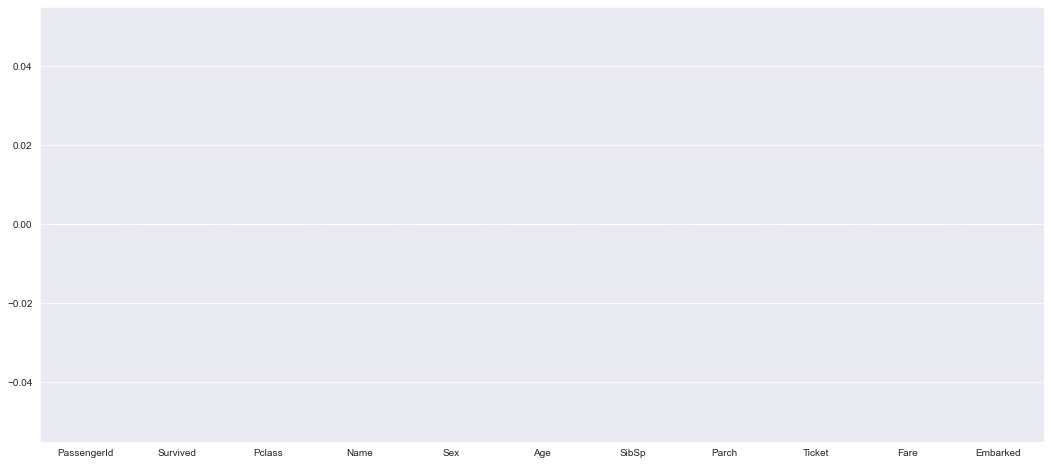

In [26]:
#Checking the same missing values plot, we can see that Cabin is no longer in the df
sns.barplot(x = titanic_df.columns, y = titanic_df.isnull().sum().values)
plt.show()

In [27]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [28]:
#Using dummies variables for Sex and Embarked values
# pd.get_dummies(data, column, drop_first = True) will automatically assign dummy variables 
# we should always use drop_first in pd.get_dummies since this will drop one of the columns created in the dummy process
# keeping all will result in multicollinearity
test_df = pd.get_dummies(data = titanic_df, columns = ['Sex', 'Embarked']) #without drop_first = True
test_df

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,0,1,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,1,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",29.0,1,2,W./C. 6607,23.4500,1,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,0,1,1,0,0


In [29]:
titanic_df = pd.get_dummies(data = titanic_df, columns = ['Sex', 'Embarked'], drop_first = True) #with drop_first = True
titanic_df

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",29.0,1,2,W./C. 6607,23.4500,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,1,0,0


In [30]:
# Now we drop the Name and Ticket column cause they are not translatable to only number
titanic_df.drop(labels= ['Name', 'Ticket'], axis = 1, inplace = True)

In [31]:
titanic_df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1,0,1
887,888,1,1,19.0,0,0,30.0000,0,0,1
888,889,0,3,29.0,1,2,23.4500,0,0,1
889,890,1,1,26.0,0,0,30.0000,1,0,0


In [32]:
############################################### CREATING A LOGISTIC MODEL ################################################
############################# LOGISTIC MODEL IS GOOD FOR CATEGORICAL MODEL OF ONLY 2 VALUES (1 or 0) ####################

from sklearn.model_selection import train_test_split
X = titanic_df[['PassengerId', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']]
y = titanic_df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [33]:
from sklearn.model_selection import train_test_split
X = titanic_df[titanic_df.columns.drop(labels = ['Survived'])]
y = titanic_df['Survived']

In [34]:
print(X)

     PassengerId  Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  \
0              1       3  22.0      1      0   7.2500         1           0   
1              2       1  38.0      1      0  71.2833         0           0   
2              3       3  26.0      0      0   7.9250         0           0   
3              4       1  35.0      1      0  53.1000         0           0   
4              5       3  35.0      0      0   8.0500         1           0   
..           ...     ...   ...    ...    ...      ...       ...         ...   
886          887       2  27.0      0      0  13.0000         1           0   
887          888       1  19.0      0      0  30.0000         0           0   
888          889       3  29.0      1      2  23.4500         0           0   
889          890       1  26.0      0      0  30.0000         1           0   
890          891       3  32.0      0      0   7.7500         1           1   

     Embarked_S  
0             1  
1             0

In [35]:
#Assigning train/test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)

In [36]:
#Training the model with .fit(train_data, train_dat_labels)
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(max_iter = 2000) #Maximum number of interation to solve the model
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [37]:
#Evaluate model using .predict(X_test)
result = logmodel.predict(X_test)

In [38]:
#Evaluate the result with y_test labels
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test, result))
print(confusion_matrix(y_test, result))
#Increasing max iteration with higher training split seems to yield better result compared to the .3 split and 1000 iter model

              precision    recall  f1-score   support

           0       0.85      0.93      0.89        88
           1       0.84      0.67      0.75        46

    accuracy                           0.84       134
   macro avg       0.84      0.80      0.82       134
weighted avg       0.84      0.84      0.84       134

[[82  6]
 [15 31]]
